In [1]:
!datasets-cli test your_dataset --save_info

Traceback (most recent call last):
  File "c:\users\harish.patil\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\harish.patil\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\harish.patil\Anaconda3\Scripts\datasets-cli.exe\__main__.py", line 7, in <module>
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\commands\datasets_cli.py", line 39, in main
    service.run()
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\commands\test.py", line 110, in run
    module = dataset_module_factory(path)
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\load.py", line 1211, in dataset_module_factory
    raise FileNotFoundError(
FileNotFoundError: Couldn't find a dataset script at C:\Users\harish.patil\OneDrive - Wolters Kluwer\projects\learn\NLP_With_Transformers\ch2_text_classification\your_dataset\your_dataset.py or any data file i

In [2]:
from datasets import list_datasets
from datasets import load_dataset
import matplotlib.pyplot as plt

C:\Users\harish.patil\Anaconda3\envs\uc2dot2llm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# all_datastes = list_datasets()
# print(len(all_datastes))
# all_datastes[:5]

In [4]:
dataset_name = "dair-ai/emotion"
#dataset_name in all_datastes

In [5]:
ds = load_dataset(dataset_name, ignore_verifications=True )

C:\Users\harish.patil\Anaconda3\envs\uc2dot2llm\Lib\site-packages\datasets\load.py:2574: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


In [6]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = ds['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train_ds.column_names

['text', 'label']

In [10]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

**Dataset to Dataframe**

In [11]:
import pandas as pd
ds.set_format(type="pandas")

In [12]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
df = ds['train'][:]

In [14]:
df.head(2)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0


In [15]:
df.tail(2)

,text,label
15998,i feel like this was such a rude comment and i...,3
15999,i know a lot but i feel so stupid because i ca...,0


In [16]:
def label_int2str(row):
    return ds['train'].features['label'].int2str(row)

In [17]:
label_int2str(3)

'anger'

In [18]:
df['labels_names'] = df['label'].apply(label_int2str)

In [19]:
df.head(2)

,text,label,labels_names
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness


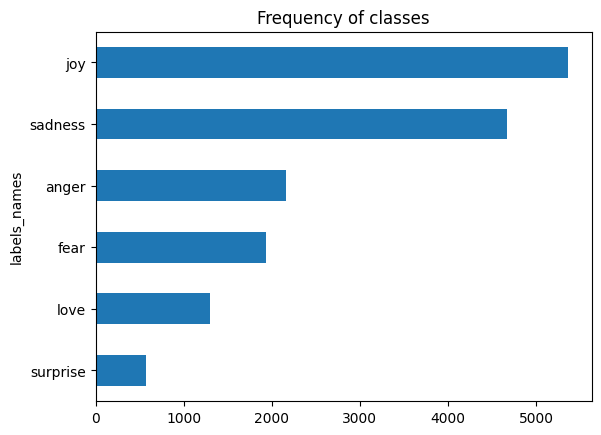

In [20]:
df['labels_names'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

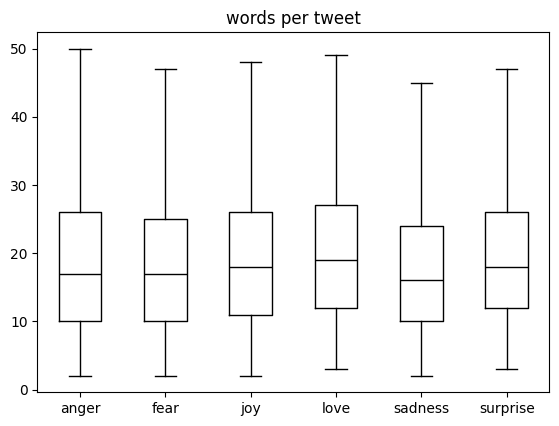

In [21]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.boxplot("words per tweet", by="labels_names", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [22]:
ds.reset_format()

**Text to tokens**

In [23]:
text = "Tokenizatoin is a core task in NLP"

In [24]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'o', 'i', 'n', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'i', 'n', ' ', 'N', 'L', 'P']


In [25]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [26]:
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'i': 8, 'k': 9, 'n': 10, 'o': 11, 'r': 12, 's': 13, 't': 14, 'z': 15}


In [27]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 11, 9, 7, 10, 8, 15, 5, 14, 11, 8, 10, 0, 8, 13, 0, 5, 0, 6, 11, 12, 7, 0, 14, 5, 13, 9, 0, 8, 10, 0, 2, 1, 3]


In [28]:
import torch
import torch.nn.functional as F

In [29]:
input_ids = torch.tensor(input_ids)
input_ids

tensor([ 4, 11,  9,  7, 10,  8, 15,  5, 14, 11,  8, 10,  0,  8, 13,  0,  5,  0,
         6, 11, 12,  7,  0, 14,  5, 13,  9,  0,  8, 10,  0,  2,  1,  3])

In [30]:
one_hot_encoding = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encoding.shape

#in tf ---> tf.one_hot and num_classes is equal to depth

torch.Size([34, 16])

In [31]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor Index: {input_ids[0]}")
print(f"One-Hot: {one_hot_encoding[0]}")

Token: T
Tensor Index: 4
One-Hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [32]:
# word tokenization

Sub word toeknization

In [33]:
from transformers import AutoTokenizer

In [34]:
model_ckpt = "distilbert-base-uncased"

In [35]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [36]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 21335, 3406, 2378, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [37]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [38]:
tokens

['[CLS]',
 'token',
 '##iza',
 '##to',
 '##in',
 'is',
 'a',
 'core',
 'task',
 'in',
 'nl',
 '##p',
 '[SEP]']

In [39]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizatoin is a core task in nlp [SEP]


In [40]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [41]:
print(tokenize(ds['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [42]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=None)

In [43]:
print(ds_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [44]:
from transformers import AutoModel

In [45]:
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [46]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

extracting last hidden state

In [47]:
text = "this is a test of short length"

In [48]:
inputs = tokenizer(text, return_tensors='pt')
print(f"Input Tensor shape: {inputs['input_ids'].size()}")

Input Tensor shape: torch.Size([1, 9])


In [49]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 1997, 2460, 3091,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [50]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [51]:
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2218, -0.1710,  0.0411,  ..., -0.1167,  0.1362,  0.4561],
         [-0.1878, -0.4113, -0.2823,  ..., -0.1281,  0.4632,  0.4309],
         [-0.3469, -0.2982, -0.0611,  ...,  0.0109,  0.0479,  0.8859],
         ...,
         [ 0.1112, -0.2087,  0.2625,  ..., -0.1965, -0.1984,  0.1430],
         [ 0.5393, -0.4618,  0.1319,  ..., -0.0482, -0.0683, -0.0572],
         [ 0.9400,  0.0568, -0.3067,  ...,  0.2337, -0.6121, -0.2331]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [52]:
outputs.last_hidden_state.size()

torch.Size([1, 9, 768])

In [53]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [54]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_states": last_hidden_state[:, 0].cpu().numpy()}

In [55]:
ds_encoded.set_format("torch",
                     columns=['input_ids', 'attention_mask', 'label'])


In [56]:
ds_hidden = ds_encoded.map(extract_hidden_states, batch_size=128, batched=True)

Map: 100%|█████████████████████████████████████████████████████████████████| 2000/2000 [00:12<00:00, 161.13 examples/s]


In [57]:
ds_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 2000
    })
})

In [58]:
import numpy as np

In [72]:
x_train = np.array(ds_hidden['train']['hidden_states'])
x_valid = np.array(ds_hidden['validation']['hidden_states'])
y_train = np.array(ds_hidden['train']['label'])
y_valid = np.array(ds_hidden['validation']['label'])

In [73]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

In [74]:
y_train[0]

0

Visualization

In [66]:
#from umap import UMAP

Training a classifier

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
%%time
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [77]:
lr_clf.score(x_valid, y_valid)

0.6335

Fine-Tuning Transformers

In [78]:
from transformers import AutoModelForSequenceClassification

In [79]:
num_labels = 6

In [80]:
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
from sklearn.metrics import accuracy_score, f1_score

In [82]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy":acc, "f1":f1}

In [83]:
from transformers import Trainer, TrainingArguments

125.0

In [99]:
batch_size = 32
logging_steps = len(ds_encoded['train'])/batch_size

In [100]:
model_name = f"{model_ckpt}-finetuned"

In [101]:
train_args = TrainingArguments(output_dir=model_name,
                              num_train_epochs=2,
                              learning_rate=2e-5,
                              per_device_train_batch_size=batch_size,
                              per_device_eval_batch_size=batch_size,
                              weight_decay=0.01,
                              eval_strategy="epoch",
                              disable_tqdm=False,
                              logging_steps=logging_steps,
                              log_level="error")

In [102]:
from transformers import Trainer

In [103]:
trainer = Trainer(model=model, args=train_args,
                 compute_metrics=compute_metrics,
                 train_dataset=ds_encoded['train'],
                 eval_dataset=ds_encoded['validation'],
                 tokenizer=tokenizer)

In [104]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.636100,0.214131,0.922000,0.922346
2,0.172100,0.167248,0.931500,0.931676


TrainOutput(global_step=1000, training_loss=0.40410991668701174, metrics={'train_runtime': 726.0715, 'train_samples_per_second': 44.073, 'train_steps_per_second': 1.377, 'total_flos': 720342861696000.0, 'train_loss': 0.40410991668701174, 'epoch': 2.0})

In [105]:
preds_output = trainer.predict(ds_encoded['validation'])

In [107]:
preds_output.metrics

{'test_loss': 0.16724786162376404,
 'test_accuracy': 0.9315,
 'test_f1': 0.9316755471584647,
 'test_runtime': 13.4272,
 'test_samples_per_second': 148.951,
 'test_steps_per_second': 4.692}

In [108]:
y_preds = np.argmax(preds_output.predictions, axis=1)